In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras import applications
from itertools import chain
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import time

In [2]:
battery = glob("./images/battery/*")
cardboard = glob("./images/cardboard/*")
glass1 = glob("./images/glass1/*")
glass2 = glob("./images/glass2/*")
glass3 = glob("./images/glass3/*")
metal = glob("./images/metal/*")
paper = glob("./images/paper/*")
plastic = glob("./images/plastic/*")
etc1 = glob("./images/etc1/*")
etc2 = glob("./images/etc2/*")
etc3 = glob("./images/etc3/*")
etc4 = glob("./images/etc4/*")

In [3]:
len(battery), len(cardboard), len(glass1), len(glass2), len(glass3), len(metal), len(paper), len(plastic), len(etc1), len(etc2), len(etc3), len(etc4)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [5]:
battery = glob("C:/Users/user/Desktop/images/battery/*")[:750]
cardboard = glob("C:/Users/user/Desktop/images/cardboard/*")[:750]
glass1 = glob("C:/Users/user/Desktop/images/glass1/*")[:250]
glass2 = glob("C:/Users/user/Desktop/images/glass2/*")[:250]
glass3 = glob("C:/Users/user/Desktop/images/glass3/*")[:250]
metal = glob("C:/Users/user/Desktop/images/metal/*")[:750]
paper = glob("C:/Users/user/Desktop/images/paper/*")[:750]
plastic = glob("C:/Users/user/Desktop/images/plastic/*")[:750]
etc1 = glob("C:/Users/user/Desktop/images/etc1/*")[:187]
etc2 = glob("C:/Users/user/Desktop/images/etc2/*")[:188]
etc3 = glob("C:/Users/user/Desktop/images/etc3/*")[:187]
etc4 = glob("C:/Users/user/Desktop/images/etc4/*")[:188]

In [6]:
X = []
X.extend(battery)
X.extend(cardboard)
X.extend(glass1)
X.extend(glass2)
X.extend(glass3)
X.extend(metal)
X.extend(paper)
X.extend(plastic)
X.extend(etc1)
X.extend(etc2)
X.extend(etc3)
X.extend(etc4)

In [7]:
y = []
for i in X:
    if 'battery' in i:
        y.append(0)
    elif 'cardboard' in i:
        y.append(1)
    elif 'glass' in i:
        y.append(2)
    elif 'metal' in i:
        y.append(3)
    elif 'paper' in i :
        y.append(4)
    elif 'plastic' in i:
        y.append(5)
    else:
        y.append(6)
y = np.array(y)

In [8]:
X_ = np.zeros((5250,150,150,3))

In [9]:
for idx, val in enumerate(X):
    dt = plt.imread(val)
    dt = cv.resize(dt,(150,150)).reshape(1,150,150,-1)
    X_[idx] = dt[:,:,:,:3]

In [10]:
len(X_)

5250

In [13]:
plt.imread(battery[0])

array([[[206, 199, 189],
        [206, 199, 189],
        [206, 199, 189],
        ...,
        [191, 184, 174],
        [191, 184, 174],
        [191, 184, 174]],

       [[206, 199, 189],
        [206, 199, 189],
        [206, 199, 189],
        ...,
        [191, 184, 174],
        [191, 184, 174],
        [191, 184, 174]],

       [[206, 199, 189],
        [206, 199, 189],
        [206, 199, 189],
        ...,
        [191, 184, 174],
        [191, 184, 174],
        [191, 184, 174]],

       ...,

       [[213, 207, 195],
        [212, 206, 194],
        [209, 203, 191],
        ...,
        [182, 175, 165],
        [182, 175, 165],
        [181, 174, 164]],

       [[213, 207, 195],
        [212, 206, 194],
        [209, 203, 191],
        ...,
        [182, 175, 165],
        [182, 175, 165],
        [182, 175, 165]],

       [[213, 207, 195],
        [212, 206, 194],
        [209, 203, 191],
        ...,
        [183, 176, 166],
        [182, 175, 165],
        [182, 175, 165]]

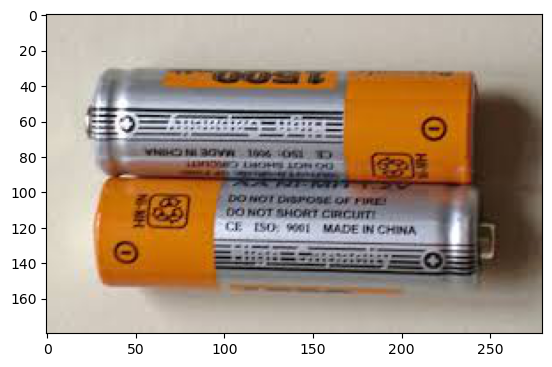

In [25]:
plt.imshow(plt.imread(battery[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


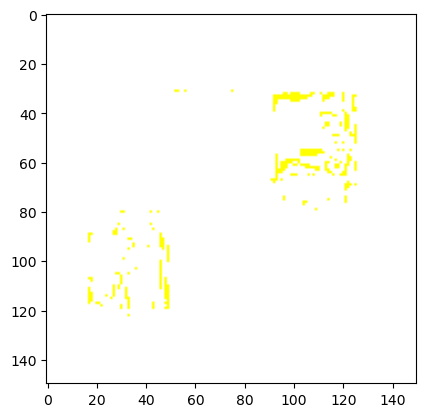

In [26]:
plt.imshow(X_[0])

In [14]:
y = to_categorical(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_,y)

In [24]:
X_train[0].shape, X_test[0].shape

((150, 150, 3), (150, 150, 3))

In [16]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [32]:
model = Sequential(
[
    Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(128, activation = 'relu'),
    BatchNormalization(),
    Dense(output_shape, activation = 'softmax')
])

In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
62/62 [==============================] - 17s 246ms/step - loss: 1.3125 - accuracy: 0.5499 - val_loss: 6.0106 - val_accuracy: 0.2430
Epoch 2/10
62/62 [==============================] - 15s 242ms/step - loss: 0.6205 - accuracy: 0.8031 - val_loss: 1.6383 - val_accuracy: 0.5392
Epoch 3/10
62/62 [==============================] - 15s 245ms/step - loss: 0.3127 - accuracy: 0.9093 - val_loss: 2.0220 - val_accuracy: 0.4516
Epoch 4/10
62/62 [==============================] - 15s 242ms/step - loss: 0.1624 - accuracy: 0.9589 - val_loss: 1.3905 - val_accuracy: 0.5750
Epoch 5/10
40/62 [==================>...........] - ETA: 5s - loss: 0.1097 - accuracy: 0.9715

In [141]:
predict_image = glob("./1.jpg")

In [26]:
b = plt.imread(predict_image[0])

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [143]:
b = cv.resize(b,(150,150)).reshape(1,150,150,-1)

In [144]:
b = b[:,:,:,:3]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


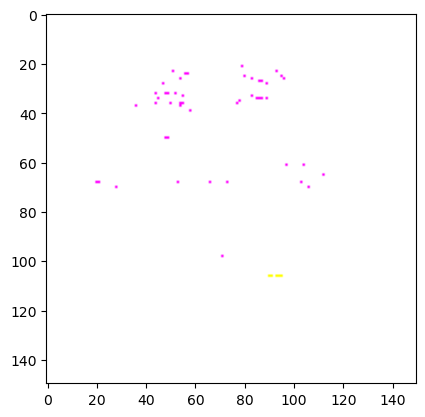

In [27]:
plt.imshow(X_test[1])

In [31]:
np.argmax(model.predict(X_test[[5]]))

1/1 [==============================] - 0s 20ms/step


5

In [146]:
c = glob('./2.png')
c = plt.imread(c[0])
c = cv.resize(c,(150,150)).reshape(1,150,150,-1)
c = c[:,:,:,:3]

In [147]:
np.argmax(model.predict(c))

1/1 [==============================] - 0s 87ms/step


4

In [148]:
c = glob('./3.jpg')
c = plt.imread(c[0])
c = cv.resize(c,(150,150)).reshape(1,150,150,-1)
c = c[:,:,:,:3]

In [149]:
np.argmax(model.predict(c))

1/1 [==============================] - 0s 22ms/step


3

In [151]:
c = glob('./4.jpg')
c = plt.imread(c[0])
c = cv.resize(c,(150,150)).reshape(1,150,150,-1)
c = c[:,:,:,:3]

In [152]:
np.argmax(model.predict(c))

1/1 [==============================] - 0s 23ms/step


6